<a href="https://colab.research.google.com/github/shophiagithub/Customer-Churn-Analysis-in-Banking-with-Artificial-Neural-Networks/blob/main/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BANK CUSTOMER CHURN PREDICTION**

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data_df=pd.read_csv('churn_modelling.csv')
data_df.shape

(10000, 14)

In [3]:
data_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
data_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
data_df=data_df.drop(['RowNumber','CustomerId','Surname'],axis=1)
data_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#checking for missing values
data_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data_df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

### **EXPLORATORY DATA ANALYSIS**

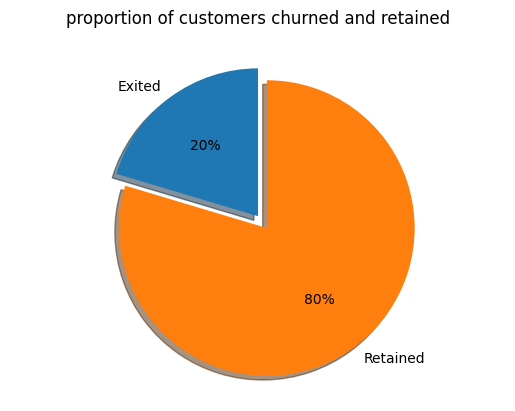

In [8]:
#plotting the pie chart to get the proportion of customers churned and retained(Univariate analysis)
plt.axis('equal')
labels=['Exited','Retained']
values=[data_df.Exited[data_df['Exited']==1].count(),data_df.Exited[data_df['Exited']==0].count()]
explode=[0,0.1]
plt.pie(values,labels=labels,explode=explode,startangle=90,shadow=True,autopct='%0.0f%%',radius=1)
plt.title("proportion of customers churned and retained")
plt.show()

20% of the customer have churned and remaining 80% haven't churned

In [9]:
data_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
List1=['Geography','Gender','HasCrCard','IsActiveMember']
list(enumerate(List1))

[(0, 'Geography'), (1, 'Gender'), (2, 'HasCrCard'), (3, 'IsActiveMember')]

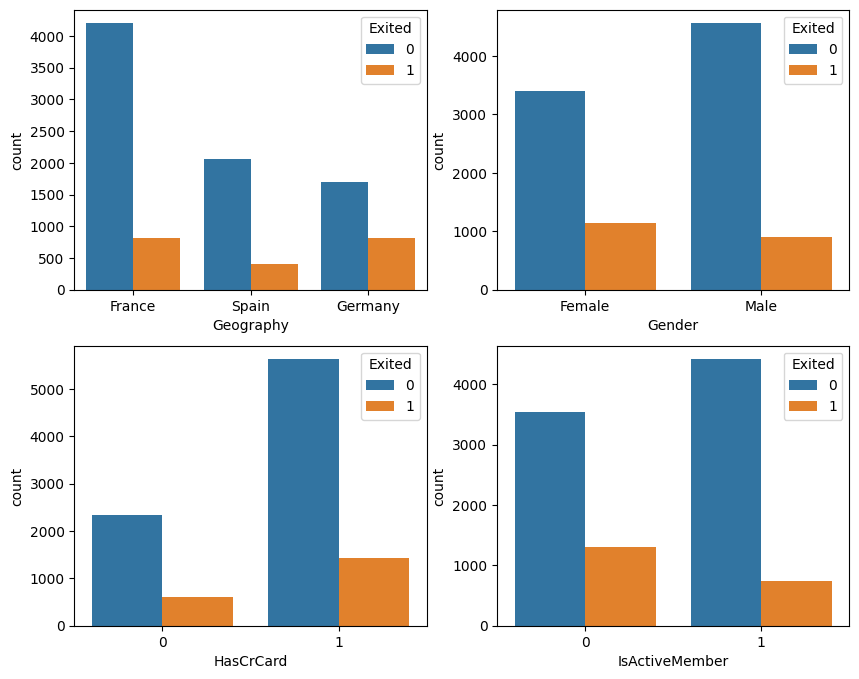

In [11]:
#plotting the categorical variables using histogram
plt.figure(figsize=(10,8))
for index,value in enumerate(List1):
  plt.subplot(2,2,index+1) # index+1 is used because subplot numbering starts from 1
  sns.countplot(x=value,hue='Exited',data=data_df)

#From the above plot we infer that
1. Most of the customers are from France and most of the customers churned are from Germany
2. The proportion of female customers churned is more than the male customers
3. Majority of the customers that churned are those with credit cards
4. The inactive members have a greater churn and the overall proportion of inactive members is also very high.

In [12]:
List2=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
list(enumerate(List2))

[(0, 'CreditScore'),
 (1, 'Age'),
 (2, 'Tenure'),
 (3, 'Balance'),
 (4, 'NumOfProducts'),
 (5, 'EstimatedSalary')]

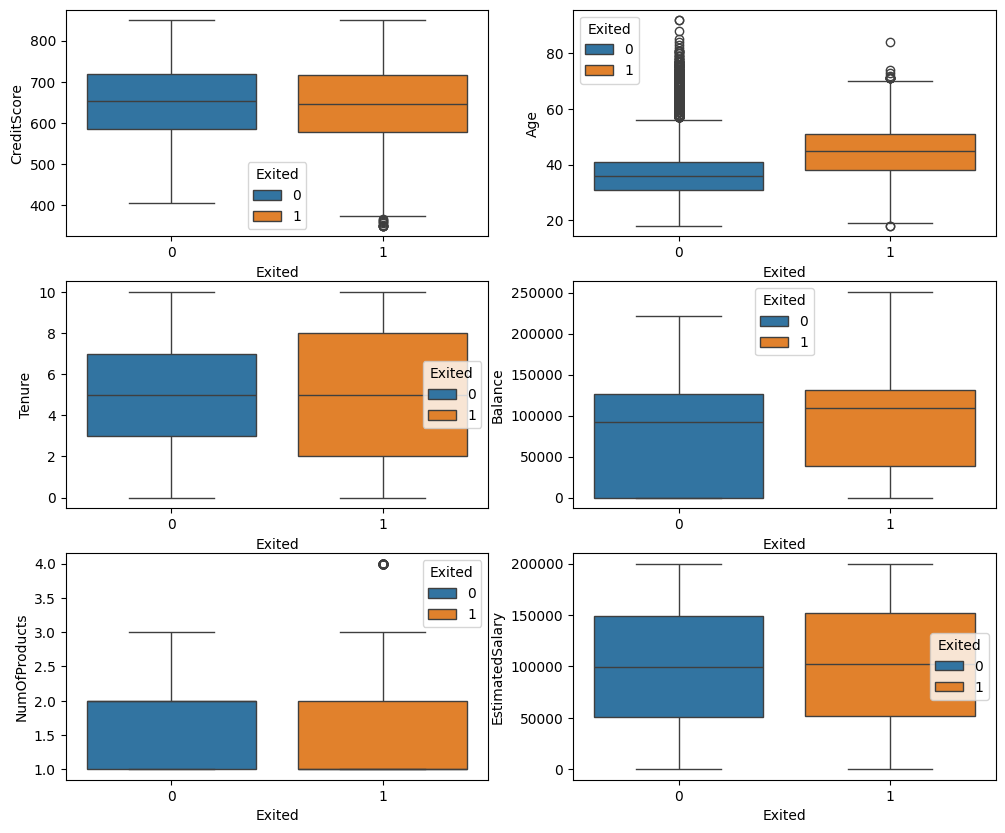

In [13]:
#plotting the categorical variables using boxplot
plt.figure(figsize=(12,10))
for index,value in enumerate(List2):
  plt.subplot(3,2,index+1)
  sns.boxplot(y=value,x='Exited',hue='Exited',data=data_df,order=[0,1])


 # From the above plot we infer that

 1.Credit score:There is no significant difference in the creditscore distribution between the retained and churned customer

 2.Age:the older customers are churning more than the younger customers

 3.Tenure:the customers who spent more time and less time with the bank are churned rather than the customers who have average tenure

 4.Balance: the customers who have a significant bank balance have churned

 5.numofproducts & salary : Both the product and salary does not have significant effect on the likelihood to churn

In [14]:
df_corr=data_df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

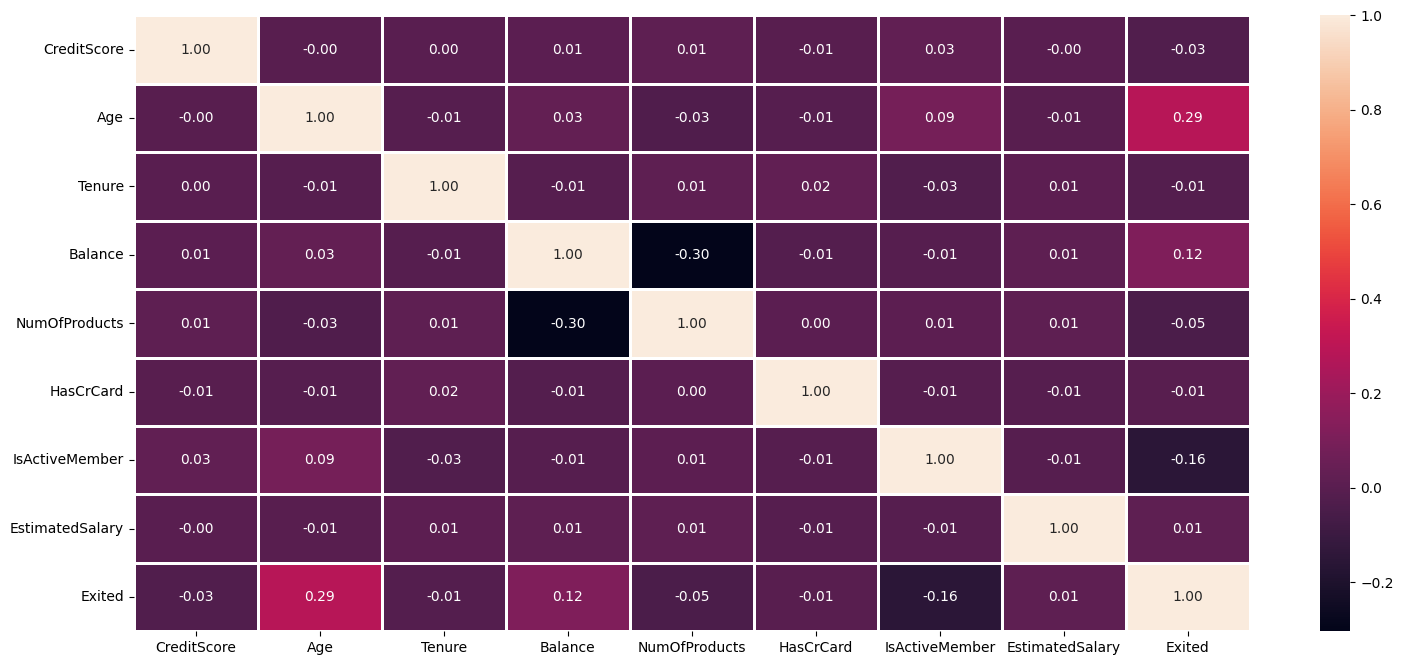

In [15]:
#Heatmap

plt.figure(figsize=(18,8))
corr=df_corr.corr()
sns.heatmap(corr,linewidths=1,annot=True,fmt=".2f")
plt.show()

From this we infer that there is no multicollinearity present in this data

In [16]:
data_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [17]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data_df['Geography']=label_encoder.fit_transform(data_df['Geography'])
data_df['Gender']=label_encoder.fit_transform(data_df['Gender'])

In [18]:
data_df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,0,28,4,130142.79,1,1,0,38190.78,0


In [21]:
from tensorflow.keras.utils import to_categorical
x=data_df.drop('Exited',axis=1)
y=to_categorical(data_df.Exited)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# ANN

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [29]:
model=Sequential()
#Adding layer with 10 neurons
model.add(Dense(10,kernel_initializer='normal',activation='relu',input_shape=(10,)))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())
#Adding another layer with 7 neurons
model.add(Dense(7,kernel_initializer='normal',activation='relu',))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())
#Adding the output layer with sigmoid activation function
model.add(Dense(2,kernel_initializer='normal',activation='sigmoid'))
#compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_history=model.fit(x_train,y_train,validation_split=0.20,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
235/235 [==============================] - 3s 5ms/step - loss: 0.5977 - accuracy: 0.7132 - val_loss: 0.5397 - val_accuracy: 0.8012
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 0.4411 - accuracy: 0.8193 - val_loss: 0.4116 - val_accuracy: 0.8264
Epoch 3/30
235/235 [==============================] - 1s 6ms/step - loss: 0.3988 - accuracy: 0.8373 - val_loss: 0.3623 - val_accuracy: 0.8556
Epoch 4/30
235/235 [==============================] - 1s 6ms/step - loss: 0.3901 - accuracy: 0.8389 - val_loss: 0.3592 - val_accuracy: 0.8548
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3827 - accuracy: 0.8421 - val_loss: 0.3555 - val_accuracy: 0.8584
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.3816 - accuracy: 0.8423 - val_loss: 0.3512 - val_accuracy: 0.8580
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3800 - accuracy: 0.8404 - val_loss: 0.3511 - val_accuracy: 0.8620
Epoch 

## **Visualizing Training and Validation Loss**

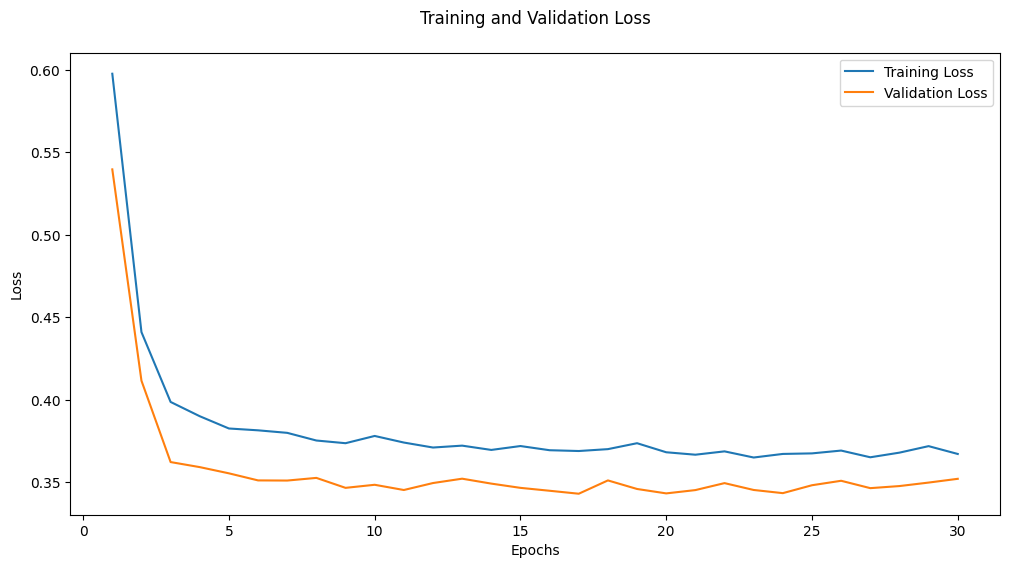

In [32]:
plt.figure(figsize=(12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

sns.lineplot(x=epochs, y=train_loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')

plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Visualizing Training and Validation accuracy**

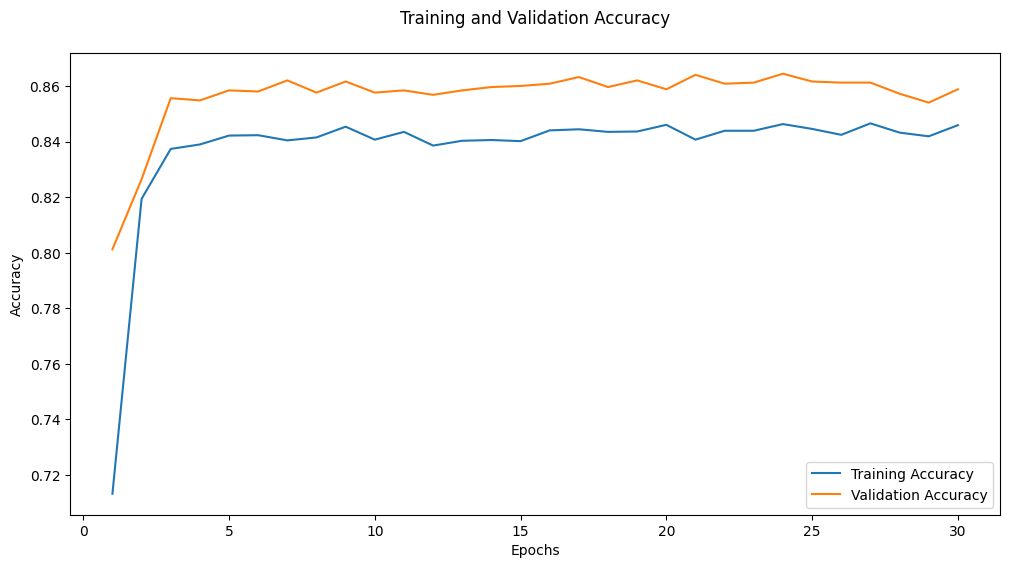

In [34]:
plt.figure(figsize=(12, 6))

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

sns.lineplot(x=epochs, y=train_accuracy, label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [36]:
acc = model.evaluate(x_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 5ms/step - loss: 0.3522 - accuracy: 0.8588
Accuracy of model is 0.8587999939918518


In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_7 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 7)                 77        
                                                                 
 dropout_8 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_8 (Bat  (None, 7)                 28        
 chNormalization)                                     